# **Lab Session 06 : MLP - Part1**

**Exercise 0: Check scikit-learn version**

---
Because default scikit-learn version of colab is higher than 0.21.3, you have to type the command
below.

After installation, you have to restart the runtime.

In [ ]:
import sklearn as s
s.__version__ 

'0.22.2.post1'

In [ ]:
!pip install scikit-learn==0.21.3

     |████████████████████████████████| 6.7MB 5.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
##Please check whether scikit-learn version is updated or not.
import sklearn as s
s.__version__

'0.21.3'

---
**Exercise 1: Install Tensorﬂow 2**


This exercise is based on the example in Section "Installing Tensorﬂow 2" on in the
textbook.

Just check the existence of tensorﬂow and its version.

***Note: You have to import tensorflow and keras before checking version.***





In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.4.1'

In [ ]:
keras.__version__

'2.4.0'



---






**Exercise 2: Building an Image Classiﬁer Using Sequential API**


This exercise is based on the example in Section "Building an Image Classiﬁer Using Sequential API" in the textbook.

Keras provides some utility functions to fetch and load common datasets.

Let’s load a dataset called "***Fashion MNIST***".



In [ ]:
fashion_mnist =  keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


*You can check the shape and the data type of the dataset.*

In [ ]:
X_train_full.shape 

(60000, 28, 28)

In [ ]:
X_train_full.dtype 

dtype('uint8')

*Note that the dataset is already split into a training set and a test set, but there is no validation set, so we’ll create one now.*

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
X_valid[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

You can assign the class name to the labels in "***Fashion MNIST***".

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
               "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
y_train[0]

4

In [ ]:
class_names[y_train[0]] # class_names[4]

'Coat'



---

**Exercise 3: Creating the model using the Sequential API**

This exercise is based on the example in Section "Creating the model using the Sequential API" in the textbook.

Creating model consists of the following two steps.

1. Create a Sequential model

2. Add some layers. There are two types of layers:

> *   ***Flatten***: convert an input image into a 1D array.

> *   ***Dense***: create a layer that contains all connections between the neurons in the layer and the
previous layer.




In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

*You can see the information of the model by the following command.*

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


***You can find out the information of the layers in the model by the following commands.***

In [ ]:
model.layers

In [ ]:
hidden1 = model.layers[1]

In [ ]:
hidden1.name

'dense'

In [ ]:
model.get_layer('dense') is hidden2

NameError: ignored

*All parameters of layers can be accessed by using a member function called get_weights().*

In [ ]:
weights, biases = hidden1.get_weights()
print(weights)

[[ 0.01850434 -0.00230278  0.02264795 ...  0.01544838  0.00421563
  -0.07257267]
 [ 0.02365793  0.03682455 -0.06247833 ...  0.04786835 -0.03339215
   0.0008415 ]
 [-0.03250141 -0.06902831 -0.03434068 ... -0.06102998  0.03597538
   0.03160832]
 ...
 [ 0.03020728 -0.04813073 -0.06245048 ... -0.02790753 -0.01449186
  -0.0650945 ]
 [-0.07069249 -0.01426134  0.029194   ...  0.05042589 -0.05733036
   0.05735666]
 [ 0.03138344  0.00694007  0.05737068 ...  0.03787652 -0.05184755
   0.01569176]]


In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)



---

# **Exercise 4: Train the model**


This exercise is based on the examples in Section "Compiling the model, Training and evaluating
the model" in the textbook.

After the model is created, you can specify the loss function and the optimizer by a member function called `compile()`.


In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])

`fit()` *will train the model.*

Epoch 1/5
1719/1719 [==============================] - 8s 3ms/step - loss: 0.9782 - accuracy: 0.6973 - val_loss: 0.5026 - val_accuracy: 0.8316
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5064 - accuracy: 0.8249 - val_loss: 0.4610 - val_accuracy: 0.8452
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4526 - accuracy: 0.8421 - val_loss: 0.4242 - val_accuracy: 0.8574
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4189 - accuracy: 0.8538 - val_loss: 0.4136 - val_accuracy: 0.8568
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3998 - accuracy: 0.8603 - val_loss: 0.3801 - val_accuracy: 0.8652


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

By using `pandas`, you can calculate the loss, the accuracy, the validation loss, and the validation accuracy in each epoch. You can show these information in a graph.

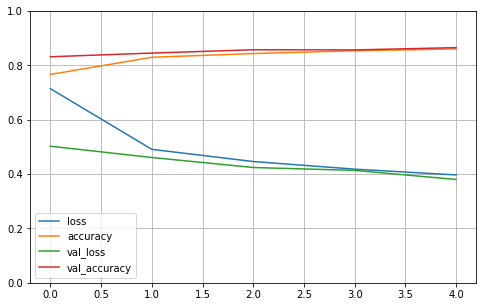

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
weights, biases d(True)
plt.gca().set_ylim(0,1)
plt.show()

---
# **Exercise 5: Evaluate the model and make a prediction**

This exercise is based on the example in Section "Training and evaluating the model, Using the model to make a prediction" in the textbook.

If you are not satisﬁed with the performance of the model, you can change the hyperparameter of the model.

After tuning, you should evaluate the model to estimate the generalization error by using a member function called `evaluate()`.


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 74.1971 - accuracy: 0.8087


[74.19705200195312, 0.8087000250816345]

*The first three instances of the test data will be used for prediction. As you can see, for each instance the model estimates one probability per class, from class 0 to class 9. For example, for the ﬁrst image it estimates that the probability of class 9 is 100% and the probabilities of the other classes are negligible.*

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

*If you only care about the class with the highest estimated probability (even if that probability is quite low), then you can use the* `predict_classes()` *method.*

In [ ]:
y_pred = model.predict_classes(X_new)
print(y_pred)

[9 2 1]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


*You can also see class name of the predicted output.*

In [ ]:
import numpy as np
print(np.array(class_names)[y_pred])

['Ankle boot' 'Pullover' 'Trouser']


*The same output of y_pred and y_new means that the model is exact.*

In [ ]:
y_new = y_test[:3]
print(y_new)


[9 2 1]




---


# **Exercise 6: Building Regression MLP Using Sequential API**

This exercise is based on the example in Section "Building Regression MLP Using Sequential API" in the textbook.

Let’s consider the California housing dataset and model it by regression.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()

*After loading the data, we split it into a training set, a validation set, and a test set, and we scale all the features.*

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, 
                                                              housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

Using the Sequential API to build, train, evaluate, and use a regression MLP to make predictions is quite similar to what we did for classiﬁcation. 

The differences are: 
- The output layer has a single neuron. 
- Mean squared error is used in the loss function. 
- Since the dataset is quite noisy, we just use a single hidden layer with fewer neurons in order to avoid overﬁtting.

In [ ]:
model = keras.models.Sequential([keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
keras.layers.Dense(1)])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.5163 - val_loss: 0.9756
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 1.5577 - val_loss: 0.6762
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5490 - val_loss: 0.4881
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4950 - val_loss: 0.7300
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7391 - val_loss: 0.4598
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4696 - val_loss: 0.4476
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4358 - val_loss: 0.4402
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4170 - val_loss: 0.4325
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4126 - val_loss: 0.4158
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4078 - val_loss: 0.4125



---


# **Exercise 7: Building Complex Models Using the Functional API**

This exercise is based on the example in Section "Building Complex Models Using the Functional API" in the textbook.

A Wide & Deep neural network is one example of nonsequential neural networks.

It connects all or part of the inputs directly to the output layer. 

1. Create a "`Input`" object.

2. Create two "`Dense`" layers with 30 neurons.

3. Create a concatenate layer "`concat`" to concatenate the input and the output of the second hidden layer.

4. Create an "`output`" layer.

5. Create a model.

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

*The input layer could contain a subset of features of the entire input dataset. You can check the figure in the textbook.*

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

*Compile and train the complex model.*

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
                    
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 3.0151 - val_loss: 1.0148
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9002 - val_loss: 0.8173
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7741 - val_loss: 0.7388
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6933 - val_loss: 0.6888
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6546 - val_loss: 0.6513
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6299 - val_loss: 0.6220
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6121 - val_loss: 0.5968
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5802 - val_loss: 0.5758
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5701 - val_loss: 0.5581
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5263 - val_loss: 0.5455

In [ ]:
y_pred = model.predict((X_new_A, X_new_B))

In [ ]:
y_pred

[array([[1.0625637],
        [1.834041 ],
        [1.5104185]], dtype=float32), array([[1.1947055],
        [1.8616133],
        [1.3088626]], dtype=float32)]

There are many use cases in which you may want to have multiple outputs: 
- The task may demand it (e.g., regression and classiﬁcation). 
- Simiarly, you may have multiple independent tasks based on the same data. 
- Regularization technique.


Adding extra outputs is quite easy: 
just connect them to the appropriate layers and add them to your model's list of outputs.

In [ ]:
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [ ]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: 1.4227 - main_output_loss: 1.2941 - aux_output_loss: 2.5800 - val_loss: 0.5562 - val_main_output_loss: 0.4871 - val_aux_output_loss: 1.1786
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5375 - main_output_loss: 0.4745 - aux_output_loss: 1.1044 - val_loss: 0.5010 - val_main_output_loss: 0.4447 - val_aux_output_loss: 1.0079
Epoch 3/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5030 - main_output_loss: 0.4515 - aux_output_loss: 0.9666 - val_loss: 0.4829 - val_main_output_loss: 0.4380 - val_aux_output_loss: 0.8874
Epoch 4/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4857 - main_output_loss: 0.4438 - aux_output_loss: 0.8630 - val_loss: 0.4741 - val_main_output_loss: 0.4369 - val_aux_output_loss: 0.8094
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4816 - main_output_loss: 0.4461 - aux_output_loss: 0.8011 - val_loss

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test,
                                                                        y_test])

162/162 [==============================] - 0s 3ms/step - loss: 0.3697 - main_output_loss: 0.3579 - aux_output_loss: 0.4763


In [ ]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])